# Explaining Cross Entropy
lets say you're a chef at a famouse restaurant serving our good friend Alice and our mortal enemy Bob<br> 
They write down all the foods they're allergic to on a piece of paper and put them in a bag. <br>
We now have a bag of words containing two overlapping sets:

$X = \{ peanuts, shrimp, potato \} $

$Y = \{ peanuts, kale, chicken \} $

we're meal-prepping by drawing 3 random words $z = \set{peanuts, kale, potato}$ from the bag, and we're interested in finding out if these ingredients are more likely to kill Bob or Alice. <br>
in other words, we're measuring if z came from the set $X$ or $Y$,
we can model this as two random events:


- $p(X = z)$ -- probability that z came from X
- $q(Y = z)$ -- probability that z came from Y

the space of total posibilities contains 9 states

cross-entropy tells us how surprised we would be if z came from X, if we assumed it came from Y, <br>
in other words: if we need one bit of information to encode z being in Y, then whats the probability that it came from X? 

>$H(p,q) = {p(z) \log q(z)}$ 



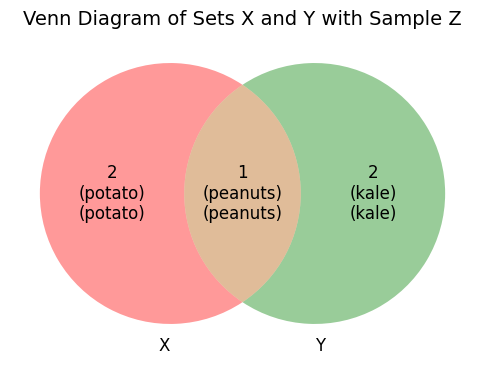

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

# Define the sets
X = {"peanuts", "shrimp", "potato"}
Y = {"peanuts", "kale", "chicken"}
Z = {"peanuts", "kale", "potato"}  # Sample

# Create a Venn diagram
fig, ax = plt.subplots(figsize=(6, 6))
v = venn2([X, Y], ('X', 'Y'))

# Add the sample elements in a distinct way
for subset in v.subset_labels:
    if subset:
        subset.set_fontsize(12)

# Highlight the elements of Z
for label in Z:
    for text in v.set_labels:
        if text and text.get_text() in ['X', 'Y']:
            if label in X and label in Y:
                v.get_label_by_id('11').set_text(v.get_label_by_id('11').get_text() + f"\n({label})")
            elif label in X:
                v.get_label_by_id('10').set_text(v.get_label_by_id('10').get_text() + f"\n({label})")
            elif label in Y:
                v.get_label_by_id('01').set_text(v.get_label_by_id('01').get_text() + f"\n({label})")

# Add a title
plt.title("Venn Diagram of Sets X and Y with Sample Z", fontsize=14)
plt.show()

In [8]:
pip install matplotlib_venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45439 sha256=56a8ff3bee12cb83516206b715cfba6ca1409cf856eda51c41a8655292201ada
  Stored in directory: c:\users\timofeji\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\c4\16\4a\93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


NameError: name 'X' is not defined

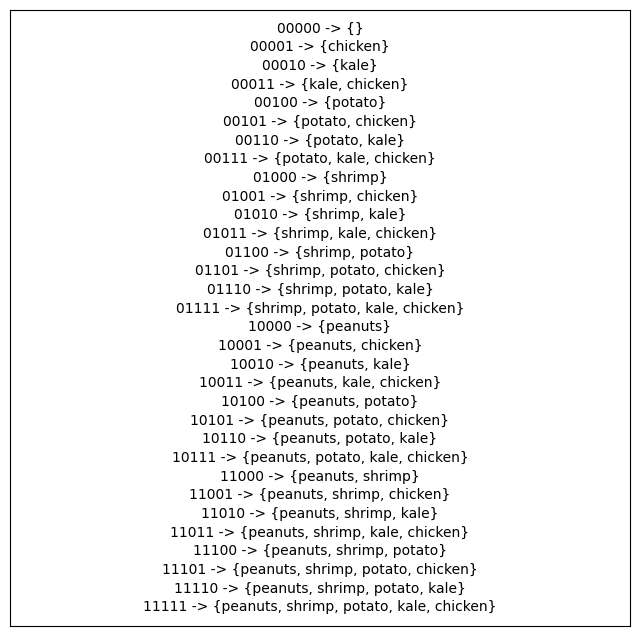

In [6]:
from itertools import product

# Define universal set elements in a fixed order
universal_set = ["peanuts", "shrimp", "potato", "kale", "chicken"]

# Generate all possible subsets (2^5 total possibilities)
all_subsets = list(product([0, 1], repeat=len(universal_set)))

# Prepare labels for the subsets
subset_labels = [
    "".join(map(str, subset)) + " -> {" + ", ".join(
        [universal_set[i] for i in range(len(subset)) if subset[i] == 1]
    ) + "}"
    for subset in all_subsets
]

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-len(all_subsets), 1)
ax.set_xticks([])
ax.set_yticks([])

# Plot each subset label
for i, label in enumerate(subset_labels):
    ax.text(0, -i, label, fontsize=10, ha="center", va="center")

# Highlight the given sets and sample
highlight_sets = {
    "X": X,
    "Y": Y,
    "Z": Z
}

for name, highlight_set in highlight_sets.items():
    encoding = "".join(["1" if elem in highlight_set else "0" for elem in universal_set])
    index = all_subsets.index(tuple(int(bit) for bit in encoding))
    ax.text(0, -index, subset_labels[index], fontsize=10, ha="center", va="center", bbox=dict(facecolor='yellow', alpha=0.5))

# Title
plt.title("Binary Encoding of All Possible States in the Space", fontsize=12)
plt.show()


# Convert the universal set to a sorted list for consistent ordering
U_list = sorted(U)

# Encode the sample Z as a bitstring again
z_encoding = [1 if element in Z else 0 for element in U_list]

# Create a bar chart representation of the encoding
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(U_list, z_encoding, color=['red' if bit else 'gray' for bit in z_encoding])

# Label the bars
for bar, bit in zip(bars, z_encoding):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(bit),
            ha='center', fontsize=12, color='black')

# Formatting
ax.set_ylim(0, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Absent", "Present"])
ax.set_title("Bit Encoding of Sample Z in the Space of Total Possibilities", fontsize=12)

plt.show()